In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas import json_normalize
import matplotlib.pyplot as plt
import numpy as np

In [3]:
secrets_file = open("secret.txt","r")
string = secrets_file.read()

In [4]:
#string

In [5]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

# Authentication with Secrets

In [6]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientID'],
                                                           client_secret=secrets_dict['ClientSecret']))

# Searching for songs with sp.search Query

In [7]:
results = sp.search(q='2Pac')#limit=50)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=2Pac&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1ZwdS5xdxEREPySFridCfh'},
       'href': 'https://api.spotify.com/v1/artists/1ZwdS5xdxEREPySFridCfh',
       'id': '1ZwdS5xdxEREPySFridCfh',
       'name': '2Pac',
       'type': 'artist',
       'uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',


In [8]:
tracks = json_normalize(results["tracks"]["items"])
#tracks

In [9]:
len(results["tracks"]["items"]) # 50 Tracks (as limited, it is the maximum)

10

In [10]:
#results["tracks"]["items"][0]# Explore the first song

In [11]:
results["tracks"]["items"][0].keys() # focus is on album, artists, id, name, popularity, type and uri

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

# Checking Album

In [12]:
# info about the album
results["tracks"]["items"][0]["album"]

{'album_type': 'compilation',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1ZwdS5xdxEREPySFridCfh'},
   'href': 'https://api.spotify.com/v1/artists/1ZwdS5xdxEREPySFridCfh',
   'id': '1ZwdS5xdxEREPySFridCfh',
   'name': '2Pac',
   'type': 'artist',
   'uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'ET',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',

In [13]:
# checking artists, id, name, release date, total tracks
results["tracks"]["items"][0]["album"].keys() 

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [14]:
# check name of album
results["tracks"]["items"][0]["album"]["name"]

'Greatest Hits'

In [15]:
# List with artists and information
results["tracks"]["items"][0]["album"]["artists"] 

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1ZwdS5xdxEREPySFridCfh'},
  'href': 'https://api.spotify.com/v1/artists/1ZwdS5xdxEREPySFridCfh',
  'id': '1ZwdS5xdxEREPySFridCfh',
  'name': '2Pac',
  'type': 'artist',
  'uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh'}]

In [16]:
#THIS FUNCTION WILL BE USED AGAIN!
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]

In [17]:
my_track = results["tracks"]["items"][0]
get_name_artists_from_track(my_track)

[("Hit 'Em Up - Single Version", '2Pac'),
 ("Hit 'Em Up - Single Version", 'Outlawz')]

In [18]:
[get_name_artists_from_track(list_el) for list_el in results["tracks"]["items"][0:5]]

[[("Hit 'Em Up - Single Version", '2Pac'),
  ("Hit 'Em Up - Single Version", 'Outlawz')],
 [('Ambitionz Az A Ridah', '2Pac')],
 [('Dear Mama', '2Pac')],
 [('California Love - Original Version', '2Pac'),
  ('California Love - Original Version', 'Roger'),
  ('California Love - Original Version', 'Dr. Dre')],
 [('Keep Ya Head Up', '2Pac')]]

In [19]:
all_songs_artists = list(map(get_name_artists_from_track,results['tracks']['items']))
all_songs_artists

[[("Hit 'Em Up - Single Version", '2Pac'),
  ("Hit 'Em Up - Single Version", 'Outlawz')],
 [('Ambitionz Az A Ridah', '2Pac')],
 [('Dear Mama', '2Pac')],
 [('California Love - Original Version', '2Pac'),
  ('California Love - Original Version', 'Roger'),
  ('California Love - Original Version', 'Dr. Dre')],
 [('Keep Ya Head Up', '2Pac')],
 [('All Eyez On Me (ft. Big Syke)', '2Pac'),
  ('All Eyez On Me (ft. Big Syke)', 'Big Syke')],
 [('Do For Love', '2Pac')],
 [('Hail Mary', '2Pac')],
 [('Keep Ya Head Up', '2Pac')],
 [('I Get Around', '2Pac'), ('I Get Around', 'Digital Underground')]]

In [20]:
# flattening 
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

# outlist=[]
# for sublist in input_list:
#     for item in sublist:
#         outlist.append(item)
# return outlist

flatten(all_songs_artists)

[("Hit 'Em Up - Single Version", '2Pac'),
 ("Hit 'Em Up - Single Version", 'Outlawz'),
 ('Ambitionz Az A Ridah', '2Pac'),
 ('Dear Mama', '2Pac'),
 ('California Love - Original Version', '2Pac'),
 ('California Love - Original Version', 'Roger'),
 ('California Love - Original Version', 'Dr. Dre'),
 ('Keep Ya Head Up', '2Pac'),
 ('All Eyez On Me (ft. Big Syke)', '2Pac'),
 ('All Eyez On Me (ft. Big Syke)', 'Big Syke'),
 ('Do For Love', '2Pac'),
 ('Hail Mary', '2Pac'),
 ('Keep Ya Head Up', '2Pac'),
 ('I Get Around', '2Pac'),
 ('I Get Around', 'Digital Underground')]

In [21]:
def get_name_artists_from_list(tracks):
    return flatten(list(map(get_name_artists_from_track,tracks['items'])))
get_name_artists_from_list(results['tracks'])

[("Hit 'Em Up - Single Version", '2Pac'),
 ("Hit 'Em Up - Single Version", 'Outlawz'),
 ('Ambitionz Az A Ridah', '2Pac'),
 ('Dear Mama', '2Pac'),
 ('California Love - Original Version', '2Pac'),
 ('California Love - Original Version', 'Roger'),
 ('California Love - Original Version', 'Dr. Dre'),
 ('Keep Ya Head Up', '2Pac'),
 ('All Eyez On Me (ft. Big Syke)', '2Pac'),
 ('All Eyez On Me (ft. Big Syke)', 'Big Syke'),
 ('Do For Love', '2Pac'),
 ('Hail Mary', '2Pac'),
 ('Keep Ya Head Up', '2Pac'),
 ('I Get Around', '2Pac'),
 ('I Get Around', 'Digital Underground')]

# PlayList

In [22]:
playlist = sp.user_playlist_tracks("spotify", "5d0yADd07UN3xjifrYGHkG") # playlist 
#playlist = sp.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9") # playlist

playlist

{'href': 'https://api.spotify.com/v1/playlists/5d0yADd07UN3xjifrYGHkG/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2016-03-26T00:53:20Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1248653856'},
    'href': 'https://api.spotify.com/v1/users/1248653856',
    'id': '1248653856',
    'type': 'user',
    'uri': 'spotify:user:1248653856'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ujr1NkqbZpYOhquczUUfl'},
       'href': 'https://api.spotify.com/v1/artists/6ujr1NkqbZpYOhquczUUfl',
       'id': '6ujr1NkqbZpYOhquczUUfl',
       'name': 'The Strumbellas',
       'type': 'artist',
       'uri': 'spotify:artist:6ujr1NkqbZpYOhquczUUfl'}],
     'available_markets': [],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6YObUrJfBLhs4f2vfRMzqD'},
     'href': 'https://api.spotify.com/v1/albu

In [23]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [24]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [25]:
#playlist["items"][0]["track"]

In [26]:
playlist["items"][0]["track"]["name"]

'Spirits'

In [27]:
playlist["total"] 

2309

In [28]:
len(playlist["items"])

100

In [29]:
# list of individual tracks from the playlist
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [30]:
get_name_artist_from_playlist_item(playlist["items"][0])

[('Spirits', 'The Strumbellas')]

In [31]:
def get_name_artists_from_playlist(input_playlist):
    return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

get_name_artists_from_playlist(playlist)

[[('Spirits', 'The Strumbellas')],
 [('Feels Like', 'Robert DeLong')],
 [("3's & 7's", 'Queens of the Stone Age')],
 [('No One Knows', 'Queens of the Stone Age')],
 [('Party Poison', 'My Chemical Romance')],
 [('Farrah Fawcett Hair', 'Capital Cities'),
  ('Farrah Fawcett Hair', 'André 3000')],
 [('My Type', 'Saint Motel')],
 [('Rock You Like A Hurricane', 'Scorpions')],
 [('Venus', 'Bananarama')],
 [("Sugar, We're Goin Down", 'Fall Out Boy')],
 [('The Middle', 'Jimmy Eat World')],
 [('You Make Me Go - Original Mix', 'Insan3lik3'),
  ('You Make Me Go - Original Mix', 'Rob Gasser'),
  ('You Make Me Go - Original Mix', 'Miyoki')],
 [('Lean On (feat. MØ & DJ Snake)', 'Major Lazer'),
  ('Lean On (feat. MØ & DJ Snake)', 'MØ'),
  ('Lean On (feat. MØ & DJ Snake)', 'DJ Snake')],
 [('Never Gonna Give You Up', 'Rick Astley')],
 [('Bonfire', 'Childish Gambino')],
 [('Naive', 'The Kooks')],
 [('Marble Soda', 'Shawn Wasabi')],
 [('Peanut Butter Jelly', 'Galantis')],
 [('Lone Digger', 'Caravan Palace

In [32]:
def get_name_artists_from_playlist(input_playlist):
    return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

get_name_artists_from_playlist(playlist)

[('Spirits', 'The Strumbellas'),
 ('Feels Like', 'Robert DeLong'),
 ("3's & 7's", 'Queens of the Stone Age'),
 ('No One Knows', 'Queens of the Stone Age'),
 ('Party Poison', 'My Chemical Romance'),
 ('Farrah Fawcett Hair', 'Capital Cities'),
 ('Farrah Fawcett Hair', 'André 3000'),
 ('My Type', 'Saint Motel'),
 ('Rock You Like A Hurricane', 'Scorpions'),
 ('Venus', 'Bananarama'),
 ("Sugar, We're Goin Down", 'Fall Out Boy'),
 ('The Middle', 'Jimmy Eat World'),
 ('You Make Me Go - Original Mix', 'Insan3lik3'),
 ('You Make Me Go - Original Mix', 'Rob Gasser'),
 ('You Make Me Go - Original Mix', 'Miyoki'),
 ('Lean On (feat. MØ & DJ Snake)', 'Major Lazer'),
 ('Lean On (feat. MØ & DJ Snake)', 'MØ'),
 ('Lean On (feat. MØ & DJ Snake)', 'DJ Snake'),
 ('Never Gonna Give You Up', 'Rick Astley'),
 ('Bonfire', 'Childish Gambino'),
 ('Naive', 'The Kooks'),
 ('Marble Soda', 'Shawn Wasabi'),
 ('Peanut Butter Jelly', 'Galantis'),
 ('Lone Digger', 'Caravan Palace'),
 ('In The Cards', 'The Hood Internet')

In [33]:
playlist = sp.user_playlist_tracks("spotify", "5d0yADd07UN3xjifrYGHkG")

In [34]:
playlist["total"] 

2309

In [35]:
# It is limited to 100 tracks
len(playlist["items"])

100

In [36]:
playlist['next']

'https://api.spotify.com/v1/playlists/5d0yADd07UN3xjifrYGHkG/tracks?offset=100&limit=100&additional_types=track'

In [37]:
sp.next(playlist)

{'href': 'https://api.spotify.com/v1/playlists/5d0yADd07UN3xjifrYGHkG/tracks?offset=100&limit=100&additional_types=track',
 'items': [{'added_at': '2018-05-02T01:40:16Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1248653856'},
    'href': 'https://api.spotify.com/v1/users/1248653856',
    'id': '1248653856',
    'type': 'user',
    'uri': 'spotify:user:1248653856'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/20JZFwl6HVl6yg8a4H3ZqK'},
       'href': 'https://api.spotify.com/v1/artists/20JZFwl6HVl6yg8a4H3ZqK',
       'id': '20JZFwl6HVl6yg8a4H3ZqK',
       'name': 'Panic! At The Disco',
       'type': 'artist',
       'uri': 'spotify:artist:20JZFwl6HVl6yg8a4H3ZqK'}],
     'available_markets': ['AT', 'CH', 'DE', 'LI', 'US'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/2YeOhhJg3OWpN0F1VYPxtW'},
     'href':

In [38]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [39]:
all_tracks = get_playlist_tracks("5d0yADd07UN3xjifrYGHkG")
len(all_tracks)

2309

In [40]:
all_tracks

[{'added_at': '2016-03-26T00:53:20Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1248653856'},
   'href': 'https://api.spotify.com/v1/users/1248653856',
   'id': '1248653856',
   'type': 'user',
   'uri': 'spotify:user:1248653856'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ujr1NkqbZpYOhquczUUfl'},
      'href': 'https://api.spotify.com/v1/artists/6ujr1NkqbZpYOhquczUUfl',
      'id': '6ujr1NkqbZpYOhquczUUfl',
      'name': 'The Strumbellas',
      'type': 'artist',
      'uri': 'spotify:artist:6ujr1NkqbZpYOhquczUUfl'}],
    'available_markets': [],
    'external_urls': {'spotify': 'https://open.spotify.com/album/6YObUrJfBLhs4f2vfRMzqD'},
    'href': 'https://api.spotify.com/v1/albums/6YObUrJfBLhs4f2vfRMzqD',
    'id': '6YObUrJfBLhs4f2vfRMzqD',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b27

In [41]:
all_tracks = [{'title': items['track']['name'], 'artist': items['track']['artists'][0]['name'], 'uri': items['track']['uri']} for items in all_tracks]
all_tracks = pd.DataFrame(all_tracks) 
    
# df = pd.DataFrame(columns = ['title', 'artists', 'uri'])
# for items in all_tracks:     
#         title = items['track']['name']
#         artist = items['track']['artists'][0]['name']
#         uri = items['track']['uri']
        
#         df = df.append({'title':title, 'artist': artists, 'uri': uri})
    
# all_tracks = all_tracks.append({'title': title, 'artist': artists, 'uri': uri})

In [42]:
all_tracks.head(5)

title                   artist                                   uri
0       Spirits          The Strumbellas  spotify:track:0VhDlpezWuAgOnfOCx2fRv
1    Feels Like            Robert DeLong  spotify:track:6iW24Pbnp9LF1pyX7LXTVT
2     3's & 7's  Queens of the Stone Age  spotify:track:63wsuMhok6GgcBRd2strGk
3  No One Knows  Queens of the Stone Age  spotify:track:6NvRxjfYkkT2SpirAlmsjH
4  Party Poison      My Chemical Romance  spotify:track:1RT6zSjs59gJdFfUshT465

In [ ]:
#all_tracks = all_tracks[all_tracks['uri'].str.startswith('spotify:track:')] # deleting sogs with odd uri
#all_tracks

In [44]:
# features = []
# for uri in all_tracks['uri']:
#     #print(uri)
#     track_features = sp.audio_features(uri)
#     if track_features:
#         features.append(track_features[0])
#     else:
#         print(f'No featuresfound for uri: {uri}')

# features_df = pd.DataFrame(features)
# merged_df = pd.merge(all_tracks, features_df, left_on = 'uri', right_on = 'uri')
        

In [ ]:
#merged_df 

In [ ]:
#merged_df.to_csv('recommender.csv', index = False)

# Clustering

In [46]:
music_data = pd.read_csv('recommender')     
music_data

track                       artist   
0              Jealous Kind Of Fella                Garland Green  \
1                      Initials B.B.             Serge Gainsbourg   
2                       Melody Twist                  Lord Melody   
3                      Mi Bomba Sonó                   Celia Cruz   
4                        Uravu Solla                  P. Susheela   
...                              ...                          ...   
8637                 Le ire di Ursus           Giampiero Boneschi   
8638                           A-B-C                John Zacherle   
8639               Useless Landscape         Antônio Carlos Jobim   
8640               Vendedor De Assaí                     Ary Lobo   
8641  Mambo Simphony - Remasterizado  Orquesta Casino De La Playa   

                                       uri  danceability  energy  key   
0     spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417  0.6200    3  \
1     spotify:track:5hjsmSnUefdUqzsDogisiX         0.498  0.5050    3   
2     spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657  0.6490    5   
3     spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590  0.5450    7   
4     spotify:track:1rQ0clvgkzWr001POOPJWx         0.515  0.7650   11   
...                                    ...           ...     ...  ...   
8637  spotify:track:3dVgolCVuNgecU5jovpc45         0.420  0.8730    3   
8638  spotify:track:0zXhzKf4raEYstebL7L42C         0.716  0.7420   10   
8639  spotify:track:2uC02PCRVM6BhAaK7dgxxp         0.361  0.0944   10   
8640  spotify:track:0gpSUWZWNIRrEenaC1ZGk9         0.452  0.7590    4   
8641  spotify:track:5j0G0nkCSPlmSCSgXchMn3         0.554  0.2780    5   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness   
0       -7.727     1       0.0403         0.490          0.000000    0.0779  \
1      -12.475     1       0.0337         0.018          0.107000    0.1760   
2      -13.392     1       0.0380         0.846          0.000004    0.1190   
3      -12.058     0       0.1040         0.706          0.024600    0.0610   
4       -3.515     0       0.1240         0.857          0.000872    0.2130   
...        ...   ...          ...           ...               ...       ...   
8637   -11.689     1       0.1000         0.808          0.879000    0.3630   
8638    -5.727     0       0.2420         0.663          0.000000    0.1070   
8639   -22.663     1       0.0327         0.940          0.000178    0.1150   
8640    -7.821     0       0.1750         0.658          0.000000    0.7380   
8641    -8.386     1       0.0349         0.928          0.922000    0.1360   

      valence    tempo  duration_ms  time_signature  chorus_hit  sections   
0       0.845  185.655       173533               3    32.94975         9  \
1       0.797  101.801       213613               4    48.82510        10   
2       0.908  115.940       223960               4    37.22663        12   
3       0.967  105.592       157907               4    24.75484         8   
4       0.906  114.617       245600               4    21.79874        14   
...       ...      ...          ...             ...         ...       ...   
8637    0.183  119.821        26244               4     0.00000         2   
8638    0.834  135.104       142987               4    28.34316        10   
8639    0.139   92.472       137200               4    56.63498         6   
8640    0.853  137.976       159107               3    28.24372         9   
8641    0.428  131.401       164227               4    37.39251         8   

      target  
0          1  
1          0  
2          0  
3          0  
4          0  
...      ...  
8637       0  
8638       0  
8639       0  
8640       0  
8641       0  

[8642 rows x 19 columns]

In [47]:
numerical_features =  music_data.select_dtypes(np.number) # numerical variables
#numerical_features

In [48]:
numerical_features.head()

danceability  energy  key  loudness  mode  speechiness  acousticness   
0         0.417   0.620    3    -7.727     1       0.0403         0.490  \
1         0.498   0.505    3   -12.475     1       0.0337         0.018   
2         0.657   0.649    5   -13.392     1       0.0380         0.846   
3         0.590   0.545    7   -12.058     0       0.1040         0.706   
4         0.515   0.765   11    -3.515     0       0.1240         0.857   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature   
0          0.000000    0.0779    0.845  185.655       173533               3  \
1          0.107000    0.1760    0.797  101.801       213613               4   
2          0.000004    0.1190    0.908  115.940       223960               4   
3          0.024600    0.0610    0.967  105.592       157907               4   
4          0.000872    0.2130    0.906  114.617       245600               4   

   chorus_hit  sections  target  
0    32.94975         9       1  
1    48.82510        10       0  
2    37.22663        12       0  
3    24.75484         8       0  
4    21.79874        14       0

In [49]:
categorical_ =  music_data.select_dtypes(object) # numerical variables
#categorical_

In [50]:
categorical_.head()

track            artist   
0  Jealous Kind Of Fella     Garland Green  \
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1  
1  spotify:track:5hjsmSnUefdUqzsDogisiX  
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh  
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv  
4  spotify:track:1rQ0clvgkzWr001POOPJWx

In [51]:
numerical_features.isna().sum().sum()

0

In [52]:
numerical_features.describe().T

count           mean            std           min   
danceability      8642.0       0.492169       0.162179      0.000000  \
energy            8642.0       0.445210       0.220172      0.000576   
key               8642.0       5.076487       3.450083      0.000000   
loudness          8642.0     -12.029726       4.993675    -41.643000   
mode              8642.0       0.755612       0.429749      0.000000   
speechiness       8642.0       0.062402       0.098393      0.000000   
acousticness      8642.0       0.615557       0.285515      0.000005   
instrumentalness  8642.0       0.149919       0.302054      0.000000   
liveness          8642.0       0.213531       0.169466      0.013600   
valence           8642.0       0.574963       0.273111      0.000000   
tempo             8642.0     115.125274      29.210880      0.000000   
duration_ms       8642.0  183638.344133  100574.385376  15168.000000   
time_signature    8642.0       3.816593       0.526829      0.000000   
chorus_hit        8642.0      38.938212      17.496059      0.000000   
sections          8642.0       8.884286       4.329212      0.000000   
target            8642.0       0.500000       0.500029      0.000000   

                            25%            50%            75%           max  
danceability           0.382000       0.501000       0.612000  9.220000e-01  
energy                 0.281000       0.436000       0.608000  9.950000e-01  
key                    2.000000       5.000000       8.000000  1.100000e+01  
loudness             -14.396250     -11.203000      -8.611250 -5.070000e-01  
mode                   1.000000       1.000000       1.000000  1.000000e+00  
speechiness            0.032300       0.038700       0.052900  9.600000e-01  
acousticness           0.408000       0.683000       0.851000  9.960000e-01  
instrumentalness       0.000000       0.000041       0.036550  9.990000e-01  
liveness               0.103000       0.148000       0.278000  9.840000e-01  
valence                0.361000       0.602500       0.816000  9.930000e-01  
tempo                 93.718250     112.372000     131.915250  2.410090e+02  
duration_ms       141070.250000  162746.500000  193230.000000  2.516987e+06  
time_signature         4.000000       4.000000       4.000000  5.000000e+00  
chorus_hit            27.094223      35.159015      46.959238  1.874956e+02  
sections               7.000000       8.000000      10.000000  1.090000e+02  
target                 0.000000       0.500000       1.000000  1.000000e+00

In [53]:
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [56]:
X = numerical_features 

In [57]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#same thing in 1 line
#X_train_scaled = scaler.fit_transform(X_train)

X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

danceability    energy       key  loudness      mode  speechiness   
0     -0.463522  0.793927 -0.601901  0.861685  0.568709    -0.224644  \
1      0.035956  0.271578 -0.601901 -0.089173  0.568709    -0.291726   
2      1.016414  0.925649 -0.022171 -0.272816  0.568709    -0.248021   
3      0.603265  0.453264  0.557559 -0.005662 -1.758367     0.422797   
4      0.140785  1.452541  1.717018  1.705201 -1.758367     0.626076   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms   
0     -0.439781         -0.496361 -0.800390  0.988801  2.414642    -0.100482  \
1     -2.093029         -0.142099 -0.221478  0.813038 -0.456167     0.298052   
2      0.807161         -0.496346 -0.557849  1.219489  0.027893     0.400937   
3      0.316790         -0.414914 -0.900121  1.435531 -0.326379    -0.255859   
4      0.845690         -0.493474 -0.003132  1.212166 -0.017401     0.616114   

   time_signature  chorus_hit  sections  target  
0       -1.550105   -0.342295  0.026730     1.0  
1        0.348153    0.565125  0.257732    -1.0  
2        0.348153   -0.097832  0.719737    -1.0  
3        0.348153   -0.810708 -0.204272    -1.0  
4        0.348153   -0.979676  1.181742    -1.0

# KMeans Clustering

In [59]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

In [60]:
clusters = kmeans.predict(X_prep)     # Predicting / assigning the clusters

pd.Series(clusters).value_counts().sort_index()   # Check the size of the clusters

0    3201
1    5047
2     394
Name: count, dtype: int64

In [61]:
clusters

array([1, 1, 1, ..., 0, 1, 0])

In [63]:
categorical_['clusters'] = clusters
#categorical_

In [ ]:
# cluster_3_categorical_ = categorical_[categorical_['clusters'] == 2]
# #cluster_3_categorical_

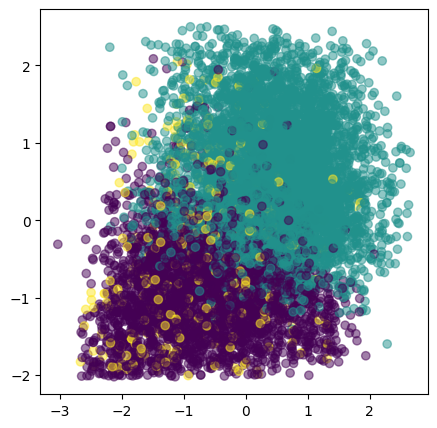

In [64]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

In [ ]:
#from sklearn.metrics import confusion_matrix
# #!pip install kneed
# from kneed import KneeLocator
# confusion_matrix(y, clusters)

In [65]:
kmeans.inertia_ 

109078.30471400317

In [66]:
# %%time
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

102335.72637758194


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

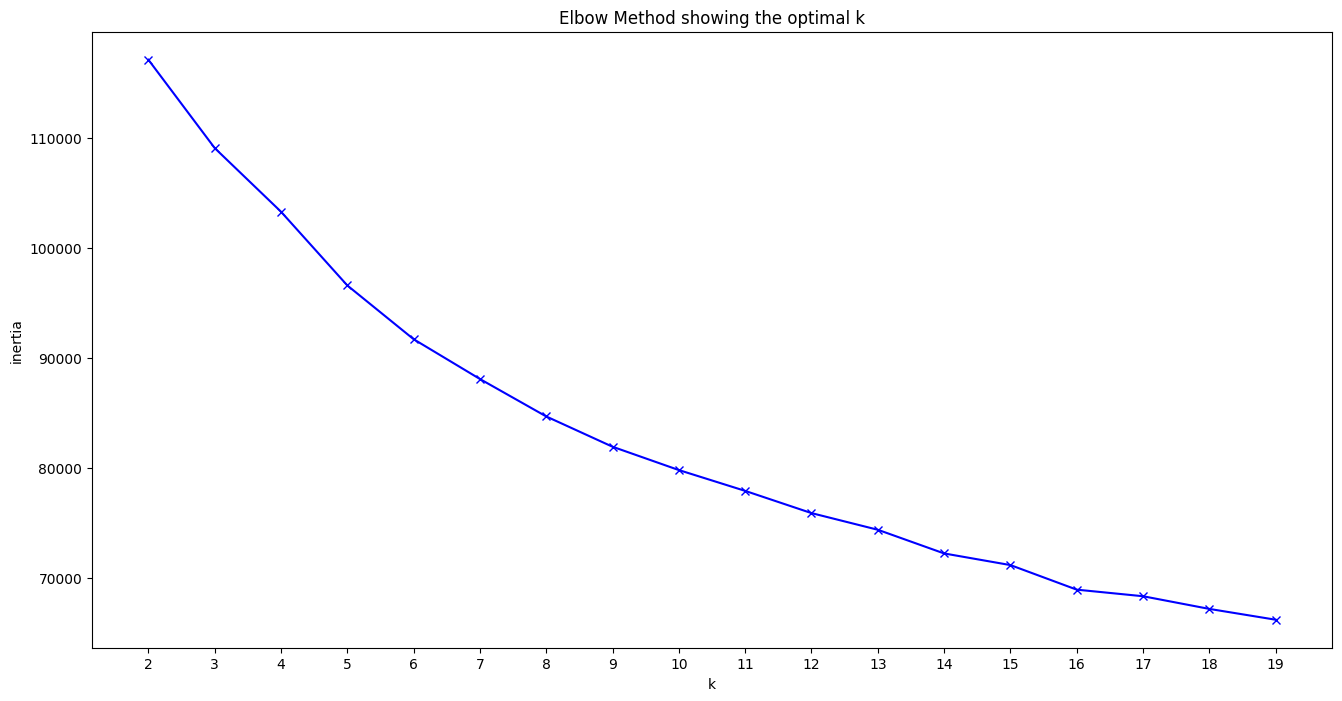

In [67]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [68]:
kmeans = KMeans(n_clusters=7, random_state=1234)    # with the elbow algorithm, 7 clusters will suffice
kmeans.fit(X_prep)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=1234)

In [69]:
cluster_num = kmeans.predict(X_prep)     # Predicting / assigning the clusters

pd.Series(cluster_num).value_counts().sort_index()   # Check the size of the clusters

0    2851
1     669
2     283
3    2101
4    1262
5    1359
6     117
Name: count, dtype: int64

In [70]:
cluster_num

array([0, 0, 0, ..., 4, 1, 4])

In [71]:
categorical_['cluster_num'] = cluster_num
#categorical_

In [72]:
cluster_3_categorical_ = categorical_[categorical_['cluster_num'] == 4]
#cluster_3_categorical_

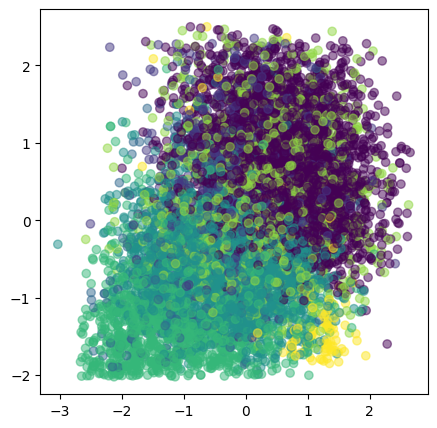

In [73]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=cluster_num,alpha=0.5)
plt.show()